# 1. Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Base

In [2]:
df = pd.read_csv("thecure_discography.csv")

# 3. Limpeza e tratamento

In [8]:
df.isna().sum().sum()

0

In [10]:
df.duplicated().sum()

0

# 4. Exploratória

## 4.1 Separação de numéricos e categóricos

In [14]:
cat_columns = []
num_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

print(cat_columns)
print(num_columns)

['album_uri', 'album_name', 'album_img', 'album_release_date', 'album_release_year', 'track_name', 'track_uri', 'key', 'mode', 'key_mode']
['Unnamed: 0', 'album_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'track_popularity']


### 4.1.1 Distribuição das variáveis categóricas

In [15]:
for col in cat_columns:
    print(col, '({})'.format(df[col].nunique()), ':')
    print(df[col].value_counts())
    print('\n\n')

album_uri (16) :
6SCYoeXeQjxbrioUozsvo1    20
7qtRliQvQBu5v6LTi3gNDD    20
6vQB3ZBxnQPP3jQcGV2qzg    20
3huHRCpnBNMIrU4e10HDtr    20
1vKNVIrAtS7Dd1szQQtQNC    20
0oi8Xnmhy3lMsSlpeoXvmP    18
69XNTota6w88wrLZt4AX9n    14
0gd0t1iQ3WReB8TNQvALTV    13
3x1CmNdXWU0DzpTZXFFRZu    12
2kvp7gVn5GL2r6B6w6piuc    12
1YYbrkGIPNnqLEcoWEVcuu    11
1ETZiFVSXzYsiIZ0PUkMKP    10
1KS5qoTz816CsgxMFujW64    10
5swgMRfWHhnsES6D65MyN1     9
33TDfmEXufojT6jxgb3BTK     8
2xlZyYNX6RCaNb5AylzHng     6
Name: album_uri, dtype: int64



album_name (16) :
Disintegration (Deluxe Edition [Remastered])    20
The Top                                         20
Kiss Me Kiss Me Kiss Me                         20
Bestival Live 2011                              20
Mixed Up (Remastered 2018 / Deluxe Edition)     20
Show                                            18
Wild Mood Swings                                14
4:13 Dream                                      13
Paris                                           12
Wish     

In [17]:
cat_columns.remove('album_uri')
cat_columns.remove('album_img')
cat_columns.remove('track_uri')

### 4.1.2 Distribuição das variáveis numéricas

In [16]:
df[num_columns].describe()

,Unnamed: 0,album_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02,223.000000,223.000000
mean,123.816143,33.215247,0.520341,0.768982,-8.486027,0.049394,0.149261,0.233470,0.403882,0.503273,129.404668,2.919564e+05,3.955157,22.941704
std,70.931748,10.637700,0.135878,0.157281,3.847060,0.031209,0.182739,0.295339,0.326814,0.210575,29.393823,1.185817e+05,0.281178,10.092867
min,1.000000,11.000000,0.175000,0.284000,-24.265000,0.023300,0.000030,0.000000,0.038900,0.042200,74.919000,1.404670e+05,1.000000,0.000000
25%,56.500000,28.000000,0.431000,0.674500,-11.356000,0.032450,0.012700,0.001285,0.117500,0.343500,108.812000,2.163630e+05,4.000000,17.000000
50%,129.000000,34.000000,0.528000,0.805000,-7.727000,0.040500,0.067400,0.060600,0.300000,0.506000,128.105000,2.624930e+05,4.000000,22.000000
75%,184.500000,38.000000,0.608000,0.900000,-5.750500,0.051400,0.218000,0.457000,0.694500,0.658000,150.101500,3.443530e+05,4.000000,28.000000
max,240.000000,52.000000,0.848000,0.998000,-1.378000,0.267000,0.759000,0.933000,1.000000,0.960000,204.468000,1.286600e+06,5.000000,62.000000


## Observações até aqui

- O 'tom' mais utilizado das músicas do The Cure é 'Lá' (A), porém, a combinação Tom + Modo preferido é 'Ré Maior' (D major) - seguido de 'Lá Maior' (A major)
- Em média, a popularidade das músicas do the cure fica em 22.9 pontos (escala de 0 a 100), sendo a música mais popular com um alcance de 62 pontos.

<function matplotlib.pyplot.show(close=None, block=None)>

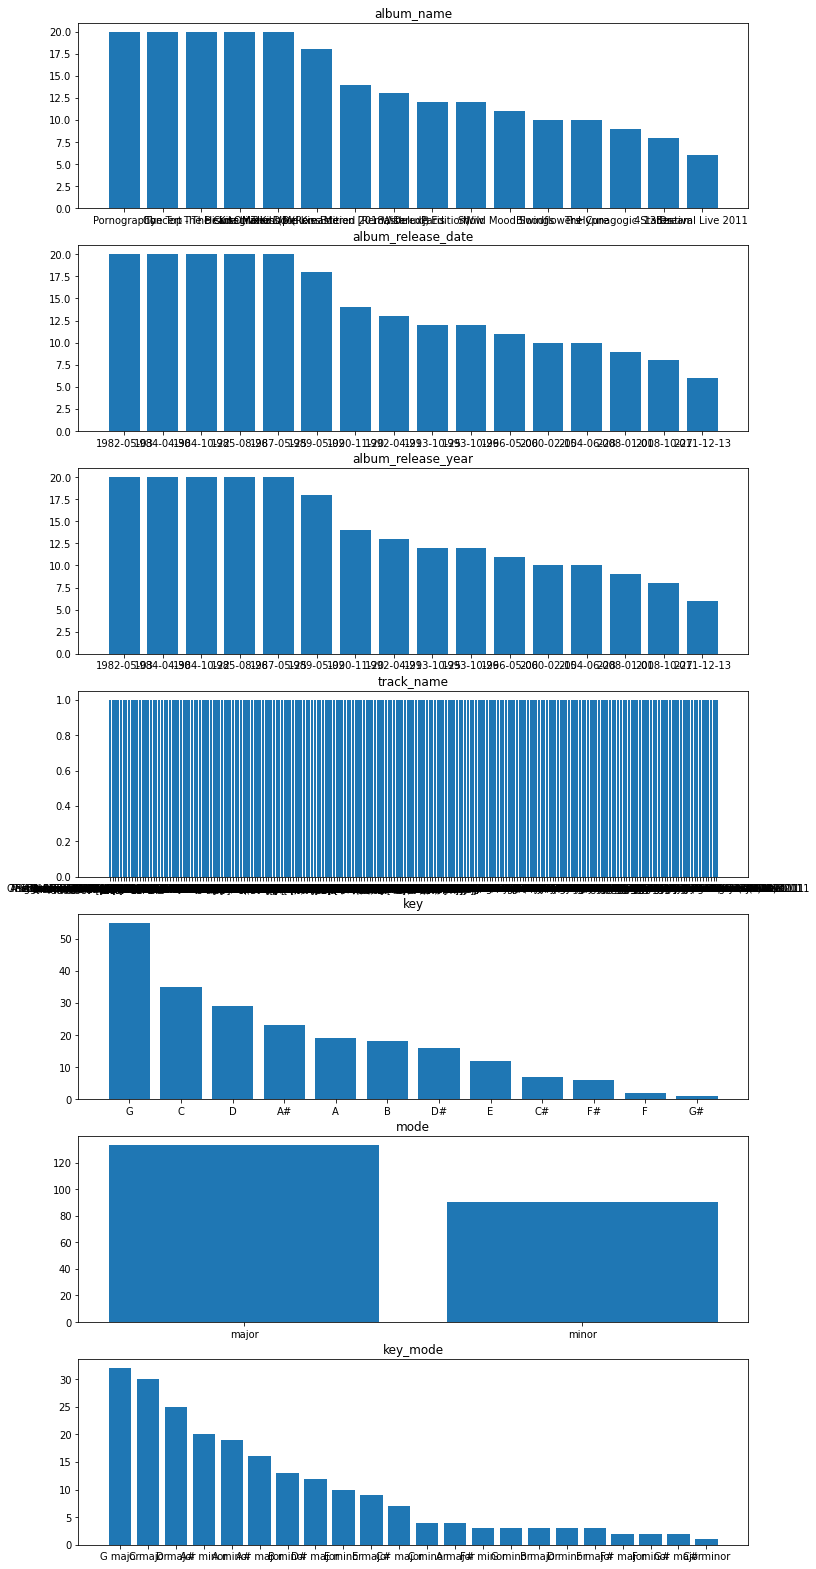

In [25]:
fig, ax = plt.subplots(len(cat_columns))
fig.set_size_inches(12, len(cat_columns)*4)

i = 0

for col in cat_columns:
    ax[i].bar(df[col].unique(), df[col].value_counts())
    ax[i].set_title(col)
    
    i = i+1
    
plt.show

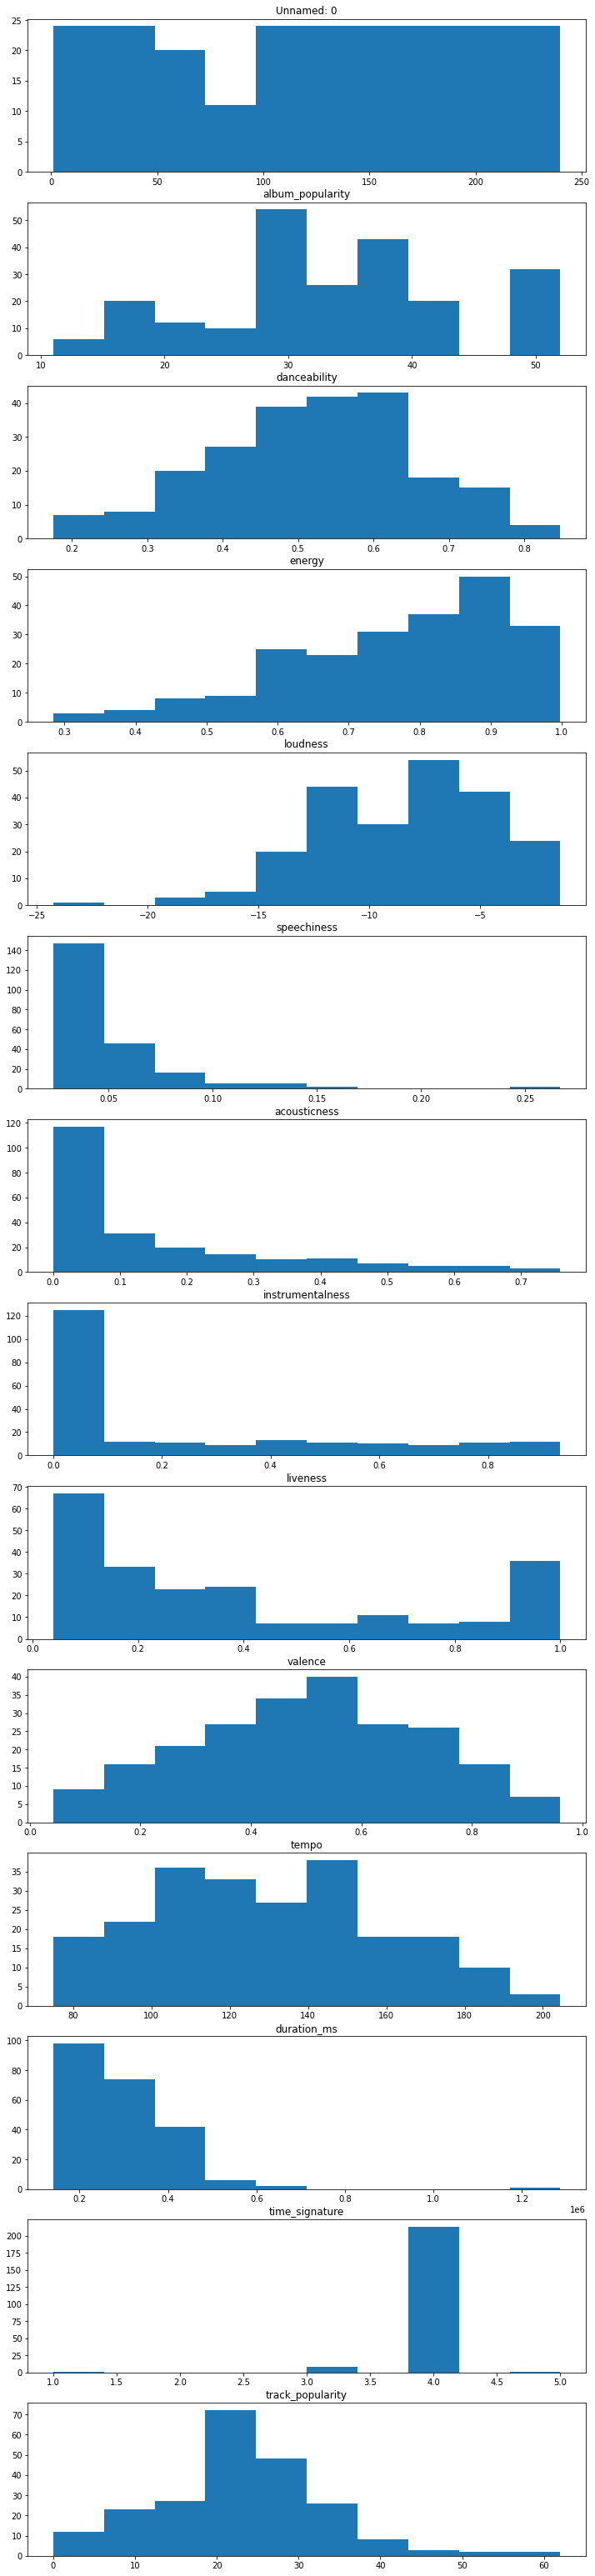

In [27]:
fig, ax = plt.subplots(len(num_columns))
fig.set_size_inches(12, len(num_columns)*4)

i = 0

for col in num_columns:
    ax[i].hist(df[col])
    ax[i].set_title(col)
    
    i = i +1
    
plt.show()

## 4.2 Correlações